In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{max-width:80%!important;width:auto!important;}</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%reload_ext autoreload
%autoreload 2
%matplotlib inline

import cv2

import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from depth_Functions import (
    import_raw_colour_image, 
    import_raw_depth_image,
    show_img, 
    show_array_of_images,
    show_function
)

from Equations import (
    symbol,
    equation
)

# Laplacian

In [2]:
equation('P(d|X;\\theta,\\lambda) = [E_lap]')

$$P(d|X;\theta,\lambda) = \dfrac{1}{Z}e^\left(-\sum_\limits{y=0}^Y\sum_\limits{x=0}^X\dfrac{| d_i - \overline{f}_i\overline{\theta}_y |}{2\lambda_{1y}} - \sum_\limits{s=1}^3\sum_\limits{y=0}^Y\sum_\limits{x=0}^X\sum_\limits{j}^4\dfrac{| d_i(s) - d_j(s) |}{2\lambda_{2ys}} \right)$$

## Absolute depth accuracy

In [3]:
equation('[S_patch]+[E_abs]')

$$\sum_\limits{y=0}^Y\sum_\limits{x=0}^X+| d_i - \overline{f}_i\overline{\theta}_y |$$

Y = the number of vertical patches

X = the number of horizontal

$d_i$ = the depth at patch i

In [4]:
symbol('[V_theta] = theta vector at row y')

$\overline{\theta}_y$ = theta vector at row y

## Relative depth

We take relative depth into the consideration with the following equation

In [5]:
equation('[S_scale][S_patch][S_adj][E_rel]')

$$\sum_\limits{s=1}^3\sum_\limits{y=0}^Y\sum_\limits{x=0}^X\sum_\limits{j}^4| d_i(s) - d_j(s) |$$

$d_i(s)$ is the depth of the center patch at of the patch resized to scale s

$d_j(s)$ is the depth at the given adjacent patch at scale s

## Training

Having calculated the features for our training images the goal of training is to calculate $\theta$s and $\sigma$s

## $\theta$

We calculate {{symbol('[V_theta]')}}s minimise the difference between the observed depth and predicted depth

We do this by calculating the least squares of the following equation

In [10]:
equation(f'd_i = [E_pred]')

$$d_i = \overline{f}_i\overline{\theta}_y$$

### Uncertanties

To combine the absolute and relative we must encorporate uncertanties for both

In [11]:
relative_histogram_6x8 = get_relative_histograms(image, 6, scales)

NameError: name 'get_relative_histograms' is not defined

In [12]:
relative_histogram_6x8[0].shape
relative_histogram_6x8[1].shape
relative_histogram_6x8[2].shape

NameError: name 'relative_histogram_6x8' is not defined

#### Absolute uncertanty

In [13]:
equation(f'[V_l1]=[E_l1]')

$$\lambda_{1y}=\overline{v}_y\overline{f}_i$$

In [14]:
symbol('[V_v] = vector of chosen parameters') 

$\overline{v}_y$ = vector of chosen parameters

#### relative uncertainty

In [15]:
equation(f'[V_l2]=[E_l2]')

$$\lambda_{2ys}=\overline{u}_{ys}|y_{ijs}|$$

In [16]:
symbol('[V_u] = vector of chosen parameters') 

$\overline{u}_{ys}$ = vector of chosen parameters

In [17]:
symbol('[V_hist] = relative depth histogram')

$y_{ijs}$ = relative depth histogram

[Asshutosh et al](https://www.cs.cornell.edu/~asaxena/learningdepth/ijcv_monocular3dreconstruction.pdf) observed that the relative depth histogram and the difference in depths relationship to one another can be fairly well represented by a lapacian curve

We can therefore estimate {{symbol('[V_u]')}} fitting a lapacian graph to fit the following equation

In [18]:
equation('[V_hist] = \dfrac{1}{[V_u]}e^{[E_rel]}')

$$y_{ijs} = \dfrac{1}{\overline{u}_{ys}}e^{| d_i(s) - d_j(s) |}$$

NameError: name 'relative_histogram_6x8' is not defined

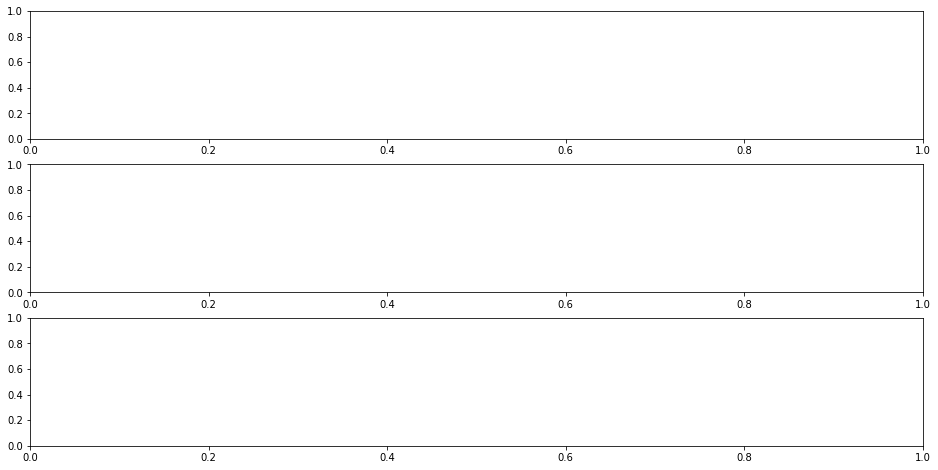

In [19]:
import matplotlib.pyplot as plt

_, axis = plt.subplots(3,1,figsize=(16,8))
for i in range(len(relative_histogram_6x8)):
    axis[i].hist(relative_histogram_6x8[i].reshape(-1,10), 10)
    axis[i].set_yscale('log')
pass;

In [ ]:
depth_patches = process_patches(depth, patchsize, function=np.mean)

In [ ]:
_, axis = plt.subplots(1,1,figsize=(16,8))

axis.scatter(relative_depths.flatten(),relative_histogram_6x8[0].reshape())